# 11.4 Histogramme (optional) 

## Lernziele

```{admonition} Lernziele
:class: important
* Sie wissen, was ein **Histogramm** ist.
* Sie können mit der Funktion **hist()** ein Histogramm erzeugen und visualisieren.
* Sie wissen, dass die Einteilung des Intervalls in die Teilintervalle **Bin**
  kritisch ist und daher sehr sorgfältig gewählt werden muss.
```

## Notenspiegel ist ein Histogramm

Das erste Histogramm, das Ihnen wahrscheinlich begegnet ist, ist der
Notenspiegel in der Schule gewesen. Für jedes Merkmal (hier = Note) des
Datensatzes (hier = Klasse) wird die Anzahl der Schülerinnen und Schüler
angegeben, die diese Note erreicht haben. Eine typische Klassenarbeit könnte
beispielsweise so aussehen:

|1 | 2 | 3 | 4 | 5 | 6 |
|---|---|---|---|---| --- |
| 2 | 4  | 8  | 6  | 3  | 1 |

Ein Histogramm ist eine Visualisierung einer solchen Tabelle. Dabei werden in
der Regel Balken benutzt. Auf der x-Achse sind also die Merkmale aufgetragen und
auf der y-Achse finden wir die Anzahl der Merkmale in dem Datensatz. Die Anzahl
kann dabei in absoluten Zahlen angegeben werden oder in relativen (Prozent).  

So sieht das Histogramm des Notenspiegels aus:

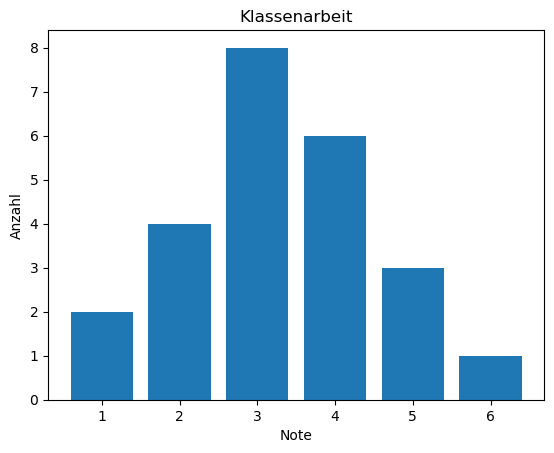

In [1]:
import matplotlib.pyplot as plt

# data
x = [1, 2, 3, 4, 5, 6]
y = [2, 4, 8, 6, 3, 1]

# plot
plt.figure()
plt.bar(x,y)
plt.xlabel('Note')
plt.ylabel('Anzahl')
plt.title('Klassenarbeit');

Diese Analysemethode wird sehr häufig eingesetzt. Daher stellen alle drei Module
[Matplotlib](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html),
[Numpy](https://numpy.org/doc/stable/reference/generated/numpy.histogram.html)
und
[Pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html)
Methoden für Histogramme zur Verfügung. Da wir ohnehin das Histogramm
visualisieren wollen, überspringen wir das Numpy-Histogramm und wenden uns
gleich dem Matplotlib-Histogramm zu, das auch die Basis für das
Pandas-Histogramm bildet.

Um die Optionen des Histogramms kennenzulernen, lassen wir jetzt Matplotlib
selbst das Histogramm, also den Notenspiegel berechnen und visualisieren. Zuerst
notieren wir die Einzelnoten, die zu dem obigen Notenspiegel gehören. Dann
wenden wir die Funktion `hist()` an.

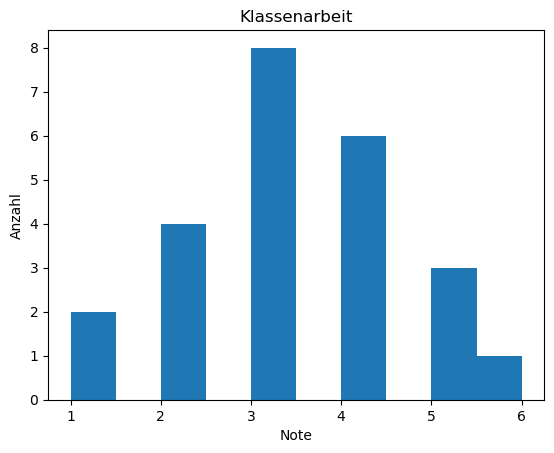

In [2]:
# Einzelnoten der Klassenarbeit
noten = [1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 5, 5, 5, 6]

# Berechnung und Visualisierung des Histogramms
plt.figure()
plt.hist(noten)
plt.xlabel('Note')
plt.ylabel('Anzahl')
plt.title('Klassenarbeit');

Warum sind bei den Noten 1 bis 4 Balken mit Abstand zueinander zu sehen, aber
bei der Note 5 und 6 kleben die Balken aneinander? Die Funktion `hist()`
funktioniert etwas anders, als wir Menschen vorgehen würden. Wir wissen, dass
die Noten 1 bis 6 diskrete Werte sind und können einfach durchzählen, um zu
bestimmen, wie häufig jede einzelne Note in der Klassenarbeit erzielt wurde.
Matplotlib geht anders vor. Zunächst werden der minimale und der maximale
vorkommene Wert ermittelt. Das sind in unserem Beispiel die 1 und die
6. Danach wird das Intervall $[1,6]$ in 10 kleinere Teilintervalle unterteilt.
Bei jedem Teilintervall gehört der minimale Wert zum Teilintervall dazu, aber
der maximale nicht. Ausnahme ist nur das letzte Teilintervall, da gehört auch
der maximale Wert, also die 6, zum Teilintervall dazu.

\begin{align*}
&\textcolor{red}{[}1,1.5), \, [1.5, 2), \, [2, 2.5), \, [2.5, 3), \, [3, 3.5) \\
&[3.5, 4), \, [4, 4.5), \, [4.5,5), \, [5, 5.5), \, [5.5,6\textcolor{red}{]} 
\end{align*}

Die Häufigkeit der Note 1 gehört zum ersten Teilintervall $[1, 1.5)$, aber die
Häufigkeit der Note 2 gehört nicht zum 2. Teilintervall, sondern zum 3.
Teilintervall $[2, 2.5)$. Die Note 5 gehört zum 9. Teilintervall und die Note 6
gehört zum 10. Teilintervall, weil es das letzte Teilintervall ist. Daher wird
der Balken mit der Häufigkeit der Note 5 beim Teilintervall $[5, 5.5)$
visualisiert und der Balken mit der Häufigkeit der Note 6 direkt daneben beim
Teilintervall $[5.5, 6]$.

Wenn dieses Verhalten nicht gewünscht ist, kann der Funktion `hist()` die
Unterteilung in die Teilintervalle selbst vorgegeben werden. Wir hätten gerne
die Intervalle

$$[1,2), [2,3), [3,4), [4,5), [5,6), [6,7].$$

Um diese Intervalle zu erzeugen, müssen wir immer den minimalen Wert eines
Teilintervalles und zum Abschluss den maximalen Wert des letzten Teilintervalls
in eine Liste notieren und dann der Funktion `hist()` als optionalen Parameter
`bins= ` übergeben. Das englische Wort bin steht dabei nicht für Tonne, sondern
bezeichnet die Teilintervalle.

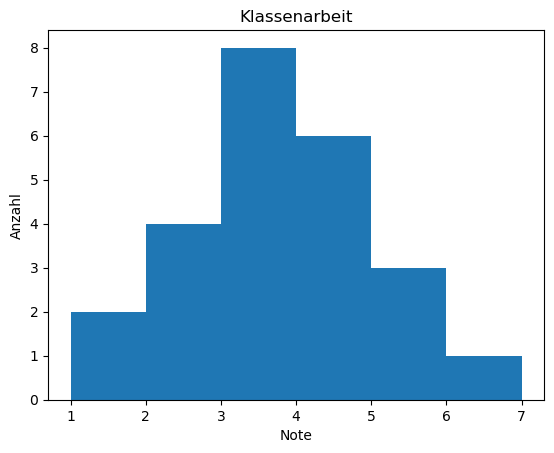

In [3]:
# Einzelnoten der Klassenarbeit
noten = [1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 5, 5, 5, 6]

# Eigene Teilintervalle
teilintervalle = [1, 2, 3, 4, 5, 6, 7]

# Berechnung und Visualisierung des Histogramms
plt.figure()
plt.hist(noten, bins=teilintervalle)
plt.xlabel('Note')
plt.ylabel('Anzahl')
plt.title('Klassenarbeit');

Die Balken werden jetzt über jedes Teilintervall platziert, so dass sie wieder
"aneinanderkleben". Mit der Option `rwidth=` können wir sie etwas schmaler
gestalten. Sollen sie beispielsweise nur 80 % der ursprünglichen Breite haben,
so setzen wir `rwidth=0.8`. Mit der Option `align='left'` zentrieren wird die
Balken um den Anfang des Teilintervalls.

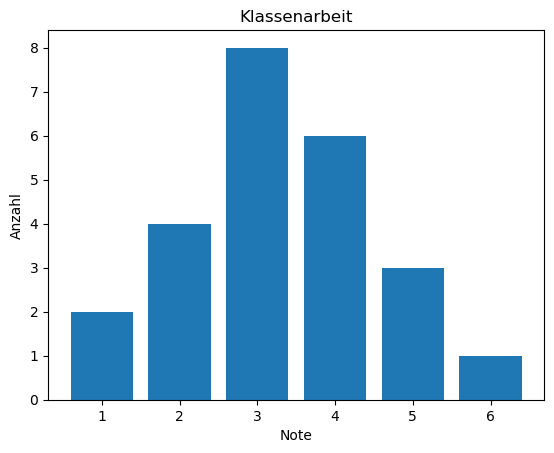

In [4]:
# Einzelnoten der Klassenarbeit
noten = [1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 5, 5, 5, 6]

# Eigene Teilintervalle
teilintervalle = [1, 2, 3, 4, 5, 6, 7]

# Berechnung und Visualisierung des Histogramms
plt.figure()
plt.hist(noten, bins=teilintervalle, rwidth=0.8, align='left')
plt.xlabel('Note')
plt.ylabel('Anzahl')
plt.title('Klassenarbeit');

Die Optionen sind ausführlich in der
[Matplotlib-Dokumentation/hist](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)
dokumentiert. Kurz zusammengefasst bedeuten die drei Optionen

* *bins=*: Wenn `bins` ein Integer ist, wird der kleinste x- und der größte
  x-Wert ermittelt. Danach werden soviele Teilintervalle gebildet, wie dort
  angegeben. Ist jedoch `bins` eine Liste von Zahlen, z.B. [1,2,3,4], so werden
  als Behälter Intervalle zwischen den aufeinanderfolgenden Werten gebildet. In
  diesem Fall wäre der 1. Behälter das Intervall [1,2), der 2. Behälter das
  Intervall [2,3), der 3. Behälter [3,4]. Bei vier Zahlen in der Liste erhalten
  wir drei Intervalle, wobei die ersten Intervalle immer rechts offen sind und
  nur das letzte Intervall ist geschlossen.   
* *align=*: Die Option `align` kann die Werte 'left', 'mid' und 'right'
  annehmen. Verwendet man die Option nicht, so wird automatisch `align='mid'`
  benutzt. Mit dieser Option wird die horizontale Ausrichtung der Balken
  gesteuert.
* *rwidth=*: Mit der dritten Option `rwidth` kann die Breite der Balken
  eingestellt werden. Die Breite wird dabei relativ als Float angegeben.
  `rwidth=0.9` würde einen Balken ergeben, der 90 % Breite zum Standard hat.

## Wahl der Bins ist entscheidend zur Interpretation der Daten

Nicht immer ist die Klasseneinteilung, also die Bins, vorher schon klar.
Beispielsweise könnten wir die Körpergröße der teilnehmenden Studierenden dieser
Vorlesung analysieren wollen. Und dabei sind wir bei der Einteilung in Bins
frei. Beispielsweise könnten wir zwei Bins, nämlich $< 120~cm$ und $\geq 120~cm$
wählen. So richtig viel verrät uns diese Aufteilung über die Verteilung der
Körpergröße jedoch nicht, denn wahrscheinlich sind alle in der letzten Bin. Aber
stattdessen Millimeterschritte zu wählen, wäre zuviel des Guten. Daher
beschäftigen wir uns als Nächstes mit der Wahl der Bin-Größe im Verhältnis zu
den gegebenen Daten.

Wir wollen die folgenden Experimente mit den Zufallszahlen vergleichbar machen.
Deswegen fixieren wir den Zufallszahlengenerator:

In [5]:
import numpy as np
zufallszahlen_generator = np.random.RandomState(0)

Im Folgenden erzeugen wir zunächst einmal 1000 normalverteilte Zufallszahlen mit
Mittelwert 0 und Standardabweichung 1. Bei (0,1)-normalverteilten Zufallszahlen
wissen wir, dass

* 68.27 % aller Zahlen zwischen -1 und 1 liegen,
* 95.45 % aller Zahlen zwischen -2 und 2 liegen und
* 99.73 % aller Zahlen zwischen -3 und 3 liegen. 

Wenn wir jetzt 100 Bins wählen, wird eine Bin ca. 0.06 breit sein. Wir tragen
jetzt die Anzahl der Zufallszahlen, die in eine Bin fällt, im Histogram auf:

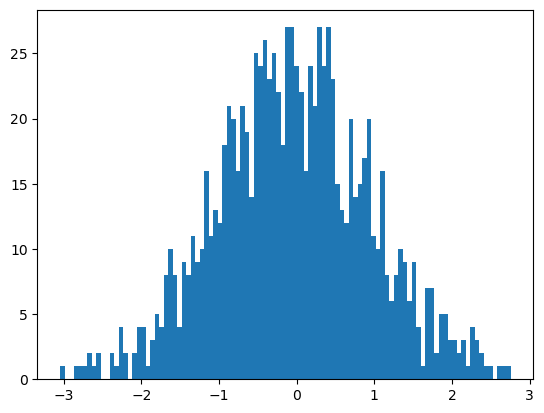

In [6]:
# Generiere normalverteilte Zufallszahlen
N = 1000
zufallszahlen = zufallszahlen_generator.randn(N)

# Histogramm
plt.figure()
plt.hist(zufallszahlen, bins=100);

Die normalverteilten Zufallszahlen zeigen die typische Gauß-Verteilung, die auch
Glockenkurve genannt wird.

```{admonition} Mini-Übung
:class: miniexercise
Ändern Sie bitte in der obigen Code-Zelle die Anzahl der Zufallszahlen.
Probieren Sie z.B. N = 10, 100, 1000 oder 100000000 aus. Ab wann erkennen Sie
die Gauß-Kurve? Gibt es eine Anzahl N von Punkten, ab der sich die Kurve nicht
mehr ändert?
```
```{admonition} Lösung
:class: miniexercise, toggle
Für eine kleine Anzahl von Zufallszahlen wie beispielsweise $N=10$ oder $N=100$
ist die Gauß-Kurve nicht erkennbar. Ab $N=1000$ ist die Gauß-Kurve deutlich
erkennbar, für mehr Zufallszahlen natürlich auch.
```

In der Praxis ist es nicht so einfach, die Anzahl der Daten zu vergrößern. Daher
probieren wir als nächstes das Umgekehrte. 

```{admonition} Mini-Übung
:class: miniexercise
Wir bleiben bei $N=1000$ Zufallszahlen, aber spielen mit der Anzahl der Bins und
der Bingröße herum. Verändern Sie die Anzahl der Bins von 6, 10, 50, 100, 250,
1000, 10000. Was beobachten Sie?
```
```{admonition} Lösung
:class: miniexercise, toggle
Wird die Anzahl der Bins klein gewählt, so sind die Teilintervalle größer. Somit
liegen (normalerweise) auch in jedem Teilintervall Zufallszahlen, so dass jede
Bin gefüllt ist. Gleichzeitig wird aber erschwert, den Typ der Verteilung
abzulesen. Wird die Anzahl der Bins erhöht, so werden die Teilintervalle kleiner
und die Struktur der Gaußschen Glockenkurve wird besser erkennbar. Wird die
Anzahl der Bins jedoch zu groß gewählt, so sind die Teilintervalle teilweise so
klein, dass in einigen Teilintervallen keine Zufallszahlen mehr liegen.
```

Zusammenfassend ist die Wahl der Bins, also die Anzahl der Teilintervalle,
kritisch und muss passend zu den Daten gewählt werden.

## Zusammenfassung 

Bei einem Histogramm werden Daten in Klassen eingeteilt und ihre Anzahl
bestimmt. Die Wahl der Klassen ist dabei kritisch und muss sorgsam erfolgen.